# First Jupyter Notebook

## Database I'm using

-- https://www.kaggle.com/datasets/aleksandrglotov/car-prices-poland?resource=download

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

fields = ['id', 'mark', 'model', 'generation_name', 'year', 'mileage', 'vol_engine', 'fuel', 'city', 'province', 'price']
data = pd.read_csv("./Car_Prices_Poland_Kaggle.csv", sep=',', usecols=fields)

df = pd.DataFrame(data=data, columns=fields)
print(df)

            id   mark  model    generation_name  year  mileage  vol_engine  \
0            0   opel  combo         gen-d-2011  2015   139568        1248   
1            1   opel  combo         gen-d-2011  2018    31991        1499   
2            2   opel  combo         gen-d-2011  2015   278437        1598   
3            3   opel  combo         gen-d-2011  2016    47600        1248   
4            4   opel  combo         gen-d-2011  2014   103000        1400   
...        ...    ...    ...                ...   ...      ...         ...   
117922  117922  volvo  xc-90  gen-ii-2014-xc-90  2020    40000        1969   
117923  117923  volvo  xc-90  gen-ii-2014-xc-90  2017    51000        1969   
117924  117924  volvo  xc-90  gen-ii-2014-xc-90  2016    83500        1969   
117925  117925  volvo  xc-90  gen-ii-2014-xc-90  2017   174000        1969   
117926  117926  volvo  xc-90  gen-ii-2014-xc-90  2016   189020        1969   

            fuel              city       province   price  
0  

## Bar diagram showing sales of cars over the years:

Text(0.5, 1.0, 'Sales of cars over all years')

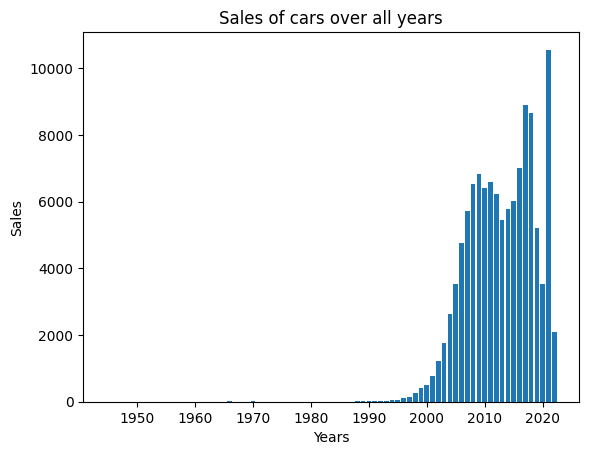

In [49]:
years = df.year.unique()
years.sort()

# prepare !dict_of_sales keys by inputing !years values

dict_of_sales = {}
for i in years:
    if i not in dict_of_sales.keys():
        dict_of_sales[i] = 0

# get number of sales for each year with !dict_of_sales

for ind in df.index:
    if df["year"][ind] in dict_of_sales:
        dict_of_sales[df["year"][ind]] += 1
#print(dict_of_sales)

dict_years_keys = list(dict_of_sales.keys())
dict__years_vals = list(dict_of_sales.values())
figBar ,ax=plt.subplots()
ax.bar(dict_years_keys, dict__years_vals)
ax.set_xlabel("Years")
ax.set_ylabel("Sales")
ax.set_title("Sales of cars over all years")

## Sales in each province:

Text(0.5, 1.0, 'Percentage of sales in provinces')

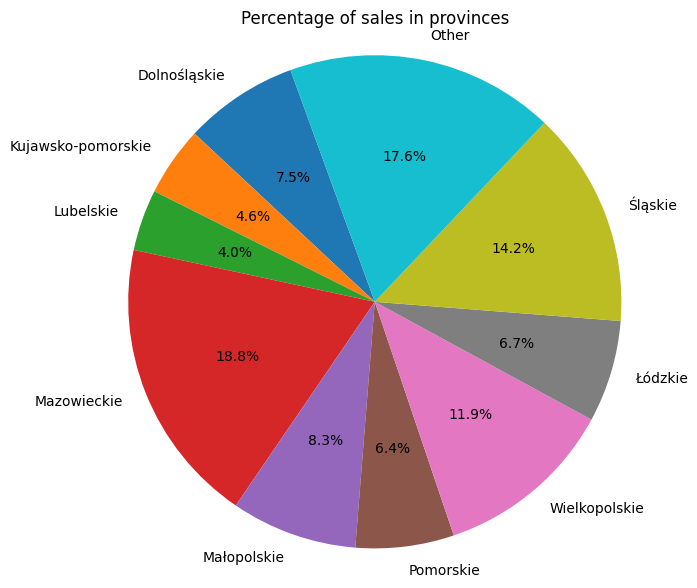

In [52]:
provinces = df.province.unique()
provinces.sort()

# prepare !dict_of_provinces keys by inputing !years values

dict_of_provinces = {}
for i in provinces:
    if i not in dict_of_provinces.keys():
        dict_of_provinces[i] = 0

# get number of sales for each province with !dict_of_provinces

for ind in df.index:
    if df["province"][ind] in dict_of_provinces:
        dict_of_provinces[df["province"][ind]] += 1

# combining to table other with value less than 3.5% of all
all = len(df.index)
dict_of_provinces["Other"] = 0
list_of_toDelete = []
for i in dict_of_provinces.keys():
    if float(dict_of_provinces[i]) / all < 0.035:
        dict_of_provinces["Other"] += dict_of_provinces[i]
        list_of_toDelete.append(i)

#delete from dictionary keys no longer in interest
for i in list_of_toDelete:
    del dict_of_provinces[i]

dict_provinces_keys = list(dict_of_provinces.keys())
dict_provinces_vals = list(dict_of_provinces.values())
figPie, bx = plt.subplots(figsize=(7,7))
bx.pie(dict_provinces_vals, labels=dict_provinces_keys, autopct='%1.1f%%',shadow=False, startangle=110)
bx.axis('equal') 
bx.set_title("Percentage of sales in provinces")